In [1]:
import numpy as np
from xgboost import XGBClassifier, XGBRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]  # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

enc = OrdinalEncoder()
y_train_new = enc.fit_transform(y_train.reshape(-1, 1))
y_test_new = enc.transform(y_test.reshape(-1, 1))

In [3]:
# xgboost:y.shape=(num, 1)
y_test_new.shape

(750, 1)

In [4]:
# Evaluation metrics for validation data, a default metric will be assigned according to objective (rmse for regression, and logloss for classification, mean average precision for ranking)
# eval_metric可选参数
# 可自定义
'''
rmse: 均方根误差
mae: 平均绝对值误差
logloss: 负对数似然函数值
mlogloss: 多分类logloss(多分类)
error: 二分类错误率
merror: 多分类错误率(多分类)
auc
'''
xg1 = XGBClassifier(n_jobs=-1, use_label_encoder=False)
eval_set = [(X_train, y_train_new),
            (X_test, y_test_new)]
xg1.fit(X_train, y_train_new, verbose=5,
        early_stopping_rounds=20,  # mlogloss在20轮迭代之内，都没有提升的话，就stop
        # A list of (X, y) tuple pairs to use as validation sets, for which metrics will be computed. Validation metrics will help us track the performance of the model.
        eval_set=eval_set,
        eval_metric=['mlogloss', 'merror'],  # 多个评估指标
        # eval_metric='mlogloss'  # 单个评估指标
        )

[0]	validation_0-mlogloss:1.34450	validation_0-merror:0.16844	validation_1-mlogloss:1.40642	validation_1-merror:0.25067
[5]	validation_0-mlogloss:0.55050	validation_0-merror:0.10533	validation_1-mlogloss:0.73089	validation_1-merror:0.20133
[10]	validation_0-mlogloss:0.33777	validation_0-merror:0.07467	validation_1-mlogloss:0.54979	validation_1-merror:0.18933
[15]	validation_0-mlogloss:0.24335	validation_0-merror:0.05289	validation_1-mlogloss:0.47946	validation_1-merror:0.18000
[20]	validation_0-mlogloss:0.19258	validation_0-merror:0.03644	validation_1-mlogloss:0.44083	validation_1-merror:0.16667
[25]	validation_0-mlogloss:0.15271	validation_0-merror:0.02667	validation_1-mlogloss:0.41298	validation_1-merror:0.15467
[30]	validation_0-mlogloss:0.12584	validation_0-merror:0.01689	validation_1-mlogloss:0.40005	validation_1-merror:0.15467
[35]	validation_0-mlogloss:0.10135	validation_0-merror:0.00800	validation_1-mlogloss:0.39082	validation_1-merror:0.15467
[40]	validation_0-mlogloss:0.08698

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [5]:
result = xg1.predict(X_test)
result

array([4, 5, 1, 4, 5, 1, 4, 1, 1, 2, 4, 2, 1, 5, 0, 4, 1, 4, 4, 4, 1, 4,
       0, 0, 1, 5, 1, 0, 5, 1, 0, 1, 6, 1, 4, 4, 4, 1, 1, 6, 2, 6, 1, 4,
       1, 1, 1, 5, 6, 2, 1, 1, 4, 4, 4, 5, 6, 4, 2, 4, 0, 5, 4, 0, 2, 5,
       1, 4, 4, 1, 1, 0, 2, 4, 1, 1, 5, 0, 6, 4, 1, 4, 1, 5, 0, 0, 1, 1,
       3, 1, 6, 4, 4, 2, 1, 1, 3, 0, 1, 1, 6, 3, 6, 2, 4, 4, 1, 1, 2, 4,
       1, 4, 4, 5, 1, 4, 0, 1, 0, 5, 4, 1, 1, 0, 0, 5, 2, 4, 1, 1, 1, 0,
       3, 4, 3, 5, 0, 0, 2, 3, 4, 1, 4, 4, 1, 2, 1, 2, 5, 0, 0, 4, 1, 6,
       6, 6, 1, 1, 3, 0, 0, 0, 5, 1, 1, 5, 1, 5, 2, 4, 1, 1, 5, 5, 2, 6,
       4, 5, 0, 0, 4, 2, 0, 1, 1, 0, 5, 1, 1, 2, 2, 1, 0, 4, 4, 1, 4, 0,
       1, 1, 4, 3, 1, 1, 5, 6, 0, 4, 0, 5, 3, 4, 3, 2, 1, 0, 4, 0, 2, 3,
       6, 2, 1, 4, 2, 5, 1, 0, 2, 0, 1, 3, 1, 3, 4, 1, 1, 1, 4, 5, 1, 0,
       0, 5, 2, 4, 1, 0, 1, 4, 6, 4, 4, 5, 1, 2, 1, 2, 4, 4, 6, 0, 1, 0,
       1, 4, 1, 6, 4, 0, 3, 1, 2, 4, 1, 4, 1, 1, 5, 4, 4, 4, 0, 6, 3, 5,
       4, 0, 4, 4, 6, 3, 1, 5, 4, 0, 4, 5, 4, 1, 4,

In [6]:
# xgboost:predict_result.shape=(num, )
result.shape

(750,)

In [7]:
# 预测结果可以输出为概率向量
xg1.predict_proba(X_test)  # 仅分类算法

array([[7.8826934e-06, 2.8332754e-04, 4.5382167e-06, ..., 9.9969316e-01,
        6.2095351e-06, 2.7109836e-06],
       [4.4596924e-05, 5.6899153e-04, 1.4796405e-04, ..., 1.4906967e-04,
        9.9900430e-01, 1.2877862e-05],
       [9.5635718e-03, 9.9022245e-01, 2.3124901e-05, ..., 1.1745978e-04,
        1.2646108e-05, 4.3059899e-05],
       ...,
       [3.5153594e-02, 7.6159963e-04, 1.0758703e-05, ..., 3.0970867e-05,
        1.7050792e-05, 9.6401644e-01],
       [2.7541161e-01, 5.2198219e-01, 4.4165316e-04, ..., 1.9814996e-01,
        3.5513258e-03, 2.1133586e-04],
       [3.0404350e-03, 9.9243248e-01, 1.4877459e-04, ..., 3.6419586e-03,
        9.7132499e-05, 5.1746127e-04]], dtype=float32)

In [8]:
xg1.score(X_test, y_test_new)  # 精度

0.8706666666666667

In [9]:
xg1.feature_importances_  # 特征的相对重要性(值越大,重要程度越高)

array([0.04042359, 0.00632524, 0.00657887, 0.01102432, 0.00900309,
       0.01816934, 0.00887775, 0.01156132, 0.00710677, 0.00981935,
       0.13231903, 0.        , 0.00175079, 0.        , 0.00945491,
       0.01655961, 0.        , 0.00729347, 0.01112137, 0.0032323 ,
       0.        , 0.        , 0.        , 0.00663392, 0.00788897,
       0.04420215, 0.01769306, 0.        , 0.        , 0.0093925 ,
       0.42719758, 0.00241256, 0.00531356, 0.01274761, 0.        ,
       0.01202025, 0.01074212, 0.00670855, 0.        , 0.        ,
       0.        , 0.        , 0.00794829, 0.0873683 , 0.        ,
       0.01540694, 0.0042418 , 0.        , 0.        , 0.        ,
       0.        , 0.00589252, 0.00556814, 0.        ], dtype=float32)

In [10]:
evals_result = xg1.evals_result()  # 根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result

{'validation_0': OrderedDict([('mlogloss',
               [1.344501,
                1.0514,
                0.861548,
                0.728911,
                0.626052,
                0.550498,
                0.488602,
                0.439773,
                0.399795,
                0.365392,
                0.33777,
                0.311279,
                0.289061,
                0.272369,
                0.257372,
                0.24335,
                0.233256,
                0.219278,
                0.209779,
                0.201599,
                0.192581,
                0.184753,
                0.177679,
                0.169745,
                0.158777,
                0.152705,
                0.147078,
                0.143326,
                0.138206,
                0.130579,
                0.125836,
                0.117492,
                0.112072,
                0.108502,
                0.10556,
                0.101347,
                0.097828,


In [11]:
train_evals = evals_result['validation_0']['mlogloss']
test_evals = evals_result['validation_1']['mlogloss']

Text(0.5, 0, 'rounds')

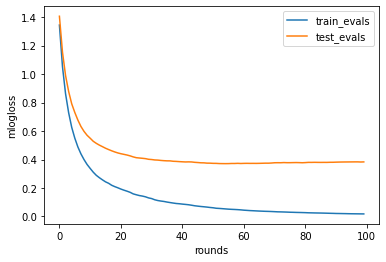

In [12]:
plt.plot(train_evals, label='train_evals')
plt.plot(test_evals, label='test_evals')
plt.legend()
plt.ylabel('mlogloss')
plt.xlabel('rounds')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

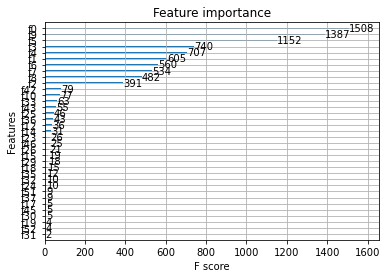

In [13]:
import xgboost

# 绘制模型特征重要
xgboost.plot_importance(xg1)

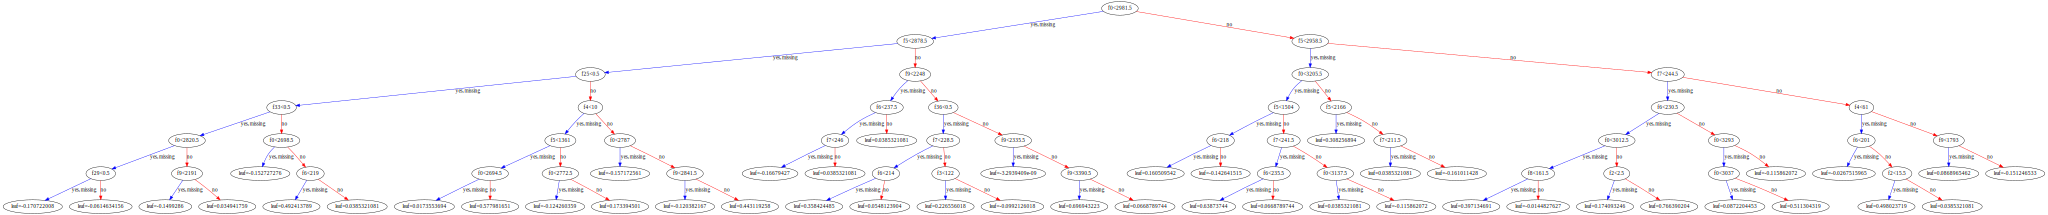

In [15]:
# 可视化xgb分割过
img = xgboost.to_graphviz(xg1)
img

In [17]:
img.view()

'Source.gv.pdf'